# Example embeddings using PCA, t-SNE, UMAP

Author: Matt Smart

- <a href='#linkExampleBlobs'> Gaussian Blobs </a>
- <a href='#linkExampleMNIST'> MNIST Dataset </a>
- <a href='#linkExampleNested'> Two Nested Clusters </a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

#### Utility functions

In [2]:
def plot_embedding_2D(Y, X_labels, title):
    assert Y.shape[1] == 2
    for label in set(X_labels):
        mask = X_labels==label
        plt.scatter(Y[:,0][mask], Y[:,1][mask], marker = '.', label = label, s=12, alpha=0.7)
    plt.xlabel(r'$x_1$'); plt.ylabel(r'$x_2$')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1),markerscale=3)
    plt.show()
    return

#### Dimension reduction hyperparameters

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap 

In [4]:
REDUCER_SEED = 0
REDUCER_COMPONENTS = 2

PCA_KWARGS = {
    'random_state': REDUCER_SEED,
    'n_components': REDUCER_COMPONENTS,
}
TSNE_KWARGS = {
    'random_state': REDUCER_SEED,
    'n_components': REDUCER_COMPONENTS,
    'metric': 'euclidean',
    'init': 'random',
    'perplexity': 30.0,
}
UMAP_KWARGS = {
    'random_state': REDUCER_SEED,
    'n_components': REDUCER_COMPONENTS,
    'metric': 'euclidean',
    'init': 'spectral',
    'unique': False,
    'n_neighbors': 15,
    'min_dist': 0.5,
    'spread': 1.0,
}

## Example: 3D blobs to 2D <a id='linkExampleBlobs'></a>

In [5]:
M = 150                     # number of samples
c = 3                       # number of clusters
n = 3                       # R^n - original dimension 
p = REDUCER_COMPONENTS      # R^p - embedding dimension

X data samples shape: (150, 3)
X_labels data labels shape: (150,)


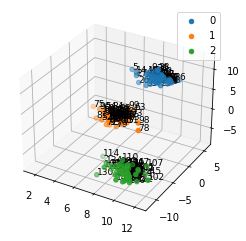

In [6]:
# generate c blobs in n-dimensions
X, X_labels = make_blobs(n_samples=M, centers=c, n_features=n, shuffle=False, random_state=4)
print("X data samples shape:", X.shape)
print("X_labels data labels shape:", X_labels.shape)

# visualize data in R^n
fig = plt.figure()
if n == 2:
    for label in set(X_labels):
        mask = X_labels==label
        plt.scatter(X[:,0][mask], X[:,1][mask], marker = '.', label = label, s=120, alpha=0.7)
    for i in range(p):
        plt.text(X[i,0],X[i,1], i, fontsize=9)
if n == 3:
    ax = fig.add_subplot(111, projection='3d')
    for label in set(X_labels):
        mask = X_labels==label
        ax.scatter(X[:,0][mask], X[:,1][mask], zs=X[:,2][mask], zdir='z', label = label, s=20, c=None, depthshade=True)
    for i in range(M):
        ax.text(X[i,0],X[i,1],X[i,2], i, fontsize=9)
plt.legend()
plt.show()

#### PCA

In [7]:
reducer_pca = PCA(**PCA_KWARGS)
Y_pca = reducer_pca.fit_transform(X)
print("(PCA) Embedded array dimensions:", Y_pca.shape)

(PCA) Embedded array dimensions: (150, 2)


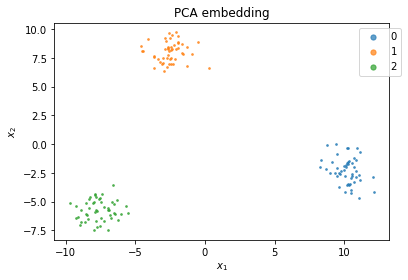

In [8]:
plot_embedding_2D(Y_pca, X_labels, 'PCA embedding')

#### t-SNE

In [9]:
reducer_tsne = TSNE(**TSNE_KWARGS)
Y_tsne = reducer_tsne.fit_transform(X)
print("(t-SNE) Embedded array dimensions:", Y_tsne.shape)

(t-SNE) Embedded array dimensions: (150, 2)


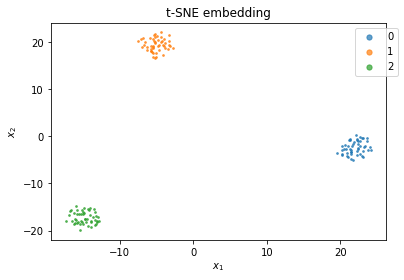

In [10]:
plot_embedding_2D(Y_tsne, X_labels, 't-SNE embedding')

#### UMAP

In [11]:
reducer_umap = umap.UMAP(**UMAP_KWARGS)
reducer_umap.fit(X)
Y_umap = reducer_umap.transform(X)
print("(UMAP) Embedded array dimensions:", Y_umap.shape)

(UMAP) Embedded array dimensions: (150, 2)


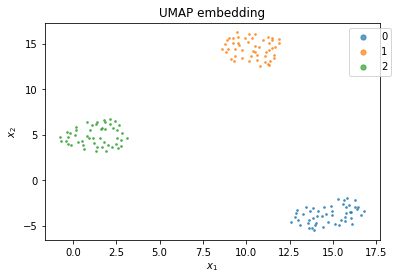

In [12]:
plot_embedding_2D(Y_umap, X_labels, 'UMAP embedding')

## Example: MNIST <a id='linkExampleMNIST'></a>

In [13]:
import torch
import torchvision 
# note that sklearn load_digits is some low-dimensional 8x8 digit dataset
###### from sklearn.datasets import load_digits

mnist_dataset = torchvision.datasets.MNIST(root='./tmp', download='True')
print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./tmp
    Transforms (if any): None
    Target Transforms (if any): None


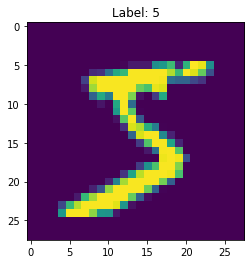

Check flattened correctly (A): [253 253 253 253 253 251  93  82  82  56]
Check flattened correctly (B): [253 253 253 253 253 251  93  82  82  56]


In [14]:
mnist_labels = mnist_dataset.targets.detach().numpy()
mnist_images = mnist_dataset.data.detach().numpy()
mnist_flattened = mnist_images.reshape((-1, 28 ** 2))

plt.imshow(mnist_images[0,:,:])
plt.title('Label: %d' % mnist_labels[0])
plt.show()
print('Check flattened correctly (A):', mnist_images[0,7,12:22])
print('Check flattened correctly (B):', mnist_flattened[0, 7*28 + 12 : 7*28 + 22])

In [15]:
M = 10000                   # take fewer points (full dataset size is 60,000)
p = REDUCER_COMPONENTS      # embedding dimension

X = mnist_flattened[:M, :]
X_labels = mnist_labels[:M]

#### PCA

In [16]:
reducer_pca = PCA(**PCA_KWARGS)
Y_pca = reducer_pca.fit_transform(X)
print("(PCA) Embedded array dimensions:", Y_pca.shape)

(PCA) Embedded array dimensions: (10000, 2)


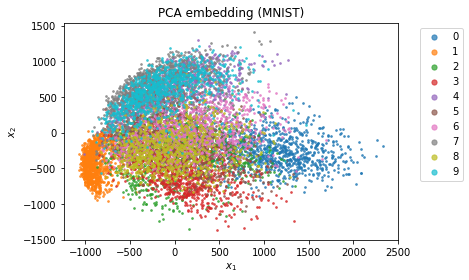

In [17]:
plot_embedding_2D(Y_pca, X_labels, 'PCA embedding (MNIST)')

#### t-SNE

In [18]:
reducer_tsne = TSNE(**TSNE_KWARGS)
Y_tsne = reducer_tsne.fit_transform(X)
print("(t-SNE) Embedded array dimensions:", Y_tsne.shape)

(t-SNE) Embedded array dimensions: (10000, 2)


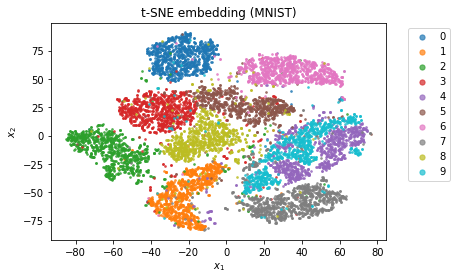

In [19]:
plot_embedding_2D(Y_tsne, X_labels, 't-SNE embedding (MNIST)')

#### UMAP

In [20]:
reducer_umap = umap.UMAP(**UMAP_KWARGS)
reducer_umap.fit(X)
Y_umap = reducer_umap.transform(X)
print("(UMAP) Embedded array dimensions:", Y_umap.shape)

(UMAP) Embedded array dimensions: (10000, 2)


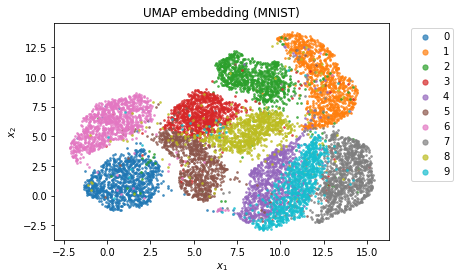

In [21]:
plot_embedding_2D(Y_umap, X_labels, 'UMAP embedding (MNIST)')

## Example: Two nested clusters <a id='linkExampleNested'></a>

In [22]:
M = 1500                     # number of samples
n = 50                      # R^n - original dimension 
n_view = 2                  # slice along which to visualize the clusters (2D or 3D)
p = REDUCER_COMPONENTS      # R^p - embedding dimension

assert n_view in [2,3]
assert p in [2,3]

X data samples shape: (1500, 50)
X_labels data labels shape: (1500,)


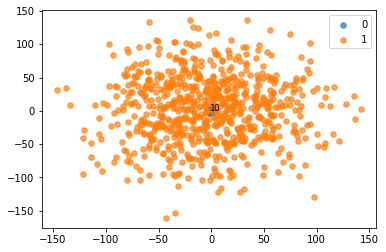

In [23]:
# generate two nested blobs in n-dimensions
centers = [np.zeros(n), np.zeros(n)]
cluster_std = [1, 50]

X, X_labels = make_blobs(
    n_samples=M, 
    centers=centers, 
    cluster_std=cluster_std,
    n_features=n, 
    shuffle=False, 
    random_state=0
)
print("X data samples shape:", X.shape)
print("X_labels data labels shape:", X_labels.shape)

# visualize data in R^n
fig = plt.figure()
if n_view == 2:
    for label in set(X_labels):
        mask = X_labels==label
        plt.scatter(X[:,0][mask], X[:,1][mask], marker='.', label=label, s=120, alpha=0.7)
    for i in range(p):
        plt.text(X[i,0],X[i,1], i, fontsize=9)
if n_view == 3:
    ax = fig.add_subplot(111, projection='3d')
    for label in set(X_labels):
        mask = X_labels==label
        ax.scatter(X[:,0][mask], X[:,1][mask], zs=X[:,2][mask], zdir='z', label=label, s=20, c=None, depthshade=True)
    for i in range(M):
        ax.text(X[i,0],X[i,1],X[i,2], i, fontsize=9)
plt.legend()
plt.show()

#### PCA

In [24]:
reducer_pca = PCA(**PCA_KWARGS)
Y_pca = reducer_pca.fit_transform(X)
print("(PCA) Embedded array dimensions:", Y_pca.shape)

(PCA) Embedded array dimensions: (1500, 2)


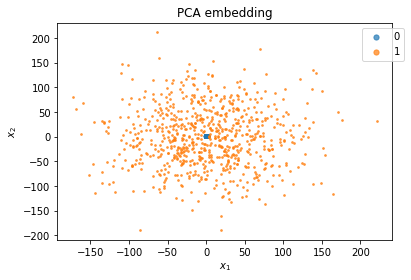

In [25]:
plot_embedding_2D(Y_pca, X_labels, 'PCA embedding')

#### t-SNE

In [26]:
reducer_tsne = TSNE(**TSNE_KWARGS)
Y_tsne = reducer_tsne.fit_transform(X)
print("(t-SNE) Embedded array dimensions:", Y_tsne.shape)

(t-SNE) Embedded array dimensions: (1500, 2)


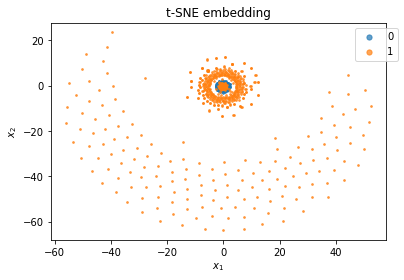

In [27]:
plot_embedding_2D(Y_tsne, X_labels, 't-SNE embedding')

#### UMAP

In [28]:
reducer_umap = umap.UMAP(**UMAP_KWARGS)
reducer_umap.fit(X)
Y_umap = reducer_umap.transform(X)
print("(UMAP) Embedded array dimensions:", Y_umap.shape)

(UMAP) Embedded array dimensions: (1500, 2)


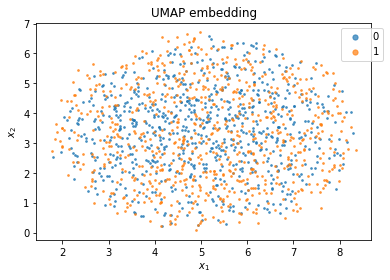

In [29]:
plot_embedding_2D(Y_umap, X_labels, 'UMAP embedding')